# __Найпростіша нейромережа з 1го нейрону__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense


2023-07-26 15:54:28.259907: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-26 15:54:28.261244: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 15:54:28.293856: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 15:54:28.295064: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 15:54:28.937757: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

#### __Навчальна вибірка__

Реальна модель: f = 1.8 * c + 32

In [2]:
c = np.array([-40, -10, 0, 8, 15, 22, 38])  # inn
f = np.array([-40, 14, 32, 46, 59, 72, 100])  # out

#### __MODEL__

In [4]:
model = keras.Sequential()  # створимо модель багатошарової нейронної мережі

In [6]:
# створимо шар нейронів повнозвязної моделі за допомогою класу Dense
model.add(Dense(units=1, input_shape=(1,), activation='linear'))

In [7]:
# складаємо з врахуванням критеріїв якості loss, та оптимізатора для алгоритму градієнтного спуску з кроком 0.1
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))  #  автовстановлення початкових вагових коефіцієнтів як випадкові 

#### __Запуск навчання__

In [8]:
history = model.fit(c, f, epochs=500, verbose=False)  # verbose=0 не виводити в консоль службову інформацію в процесі навчання

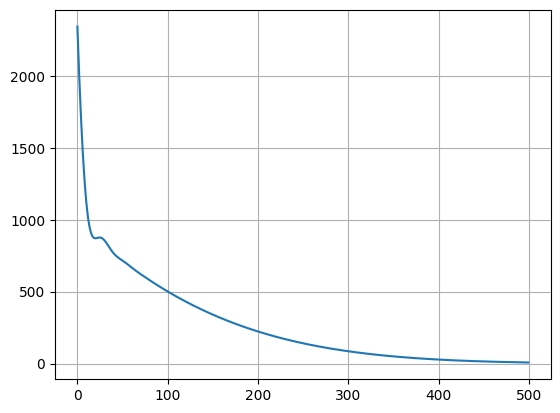

In [9]:
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

Прогнозоване значення (для 100 С = 212 Фаренгейта за реальною моделлю)

In [10]:
print(model.predict([100]))

1/1 [==============================] - 0s 78ms/step
[[211.32909]]


Вагові коефіцієнти (за реальною моделлю 1.8 та 32)

In [11]:
print(model.get_weights())

[array([[1.8218446]], dtype=float32), array([29.14462], dtype=float32)]
